<a href="https://colab.research.google.com/github/vedant-1807/Minor-Projects/blob/main/catsVsDogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:32<00:00, 33.8MB/s]
100% 1.06G/1.06G [00:32<00:00, 35.4MB/s]


In [ ]:
import zipfile 

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten, BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size= (256,256)

)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size= (256,256)

)

# this is gonna give an object of the dataset.
# and this will be stored in the format of numpy array.
# thus we will need to normalize it.

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
train_ds


<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
# Creating a CNN model

model = Sequential()
#Layer1
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))
#Layer2
model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))
#Layer3
model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 108ms/step - loss: 1.4360 - accuracy: 0.5672 - val_loss: 1.1214 - val_accuracy: 0.5466
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6380 - accuracy: 0.6429 - val_loss: 0.5769 - val_accuracy: 0.7236
Epoch 3/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5627 - accuracy: 0.7204 - val_loss: 0.5335 - val_accuracy: 0.7326
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4917 - accuracy: 0.7649 - val_loss: 0.5196 - val_accuracy: 0.7596
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4292 - accuracy: 0.7969 - val_loss: 0.4450 - val_accuracy: 0.7908
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3878 - accuracy: 0.8220 - val_loss: 0.4506 - val_accuracy: 0.8024
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3476 - accuracy: 0.8410 - val_loss: 0.4974 - val_ac

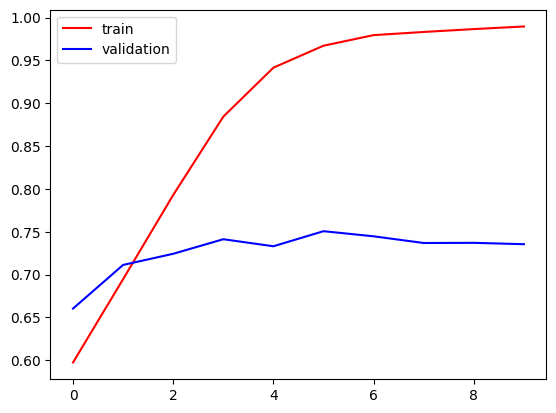

In [17]:
plt.plot(history.history['accuracy'],color='red',label = 'train')

plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

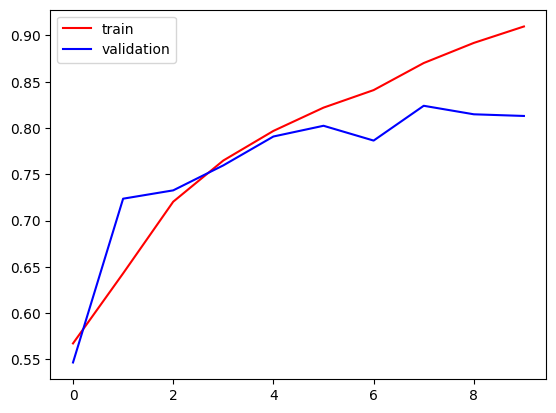

In [25]:
plt.plot(history.history['accuracy'],color='red',label = 'train')

plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

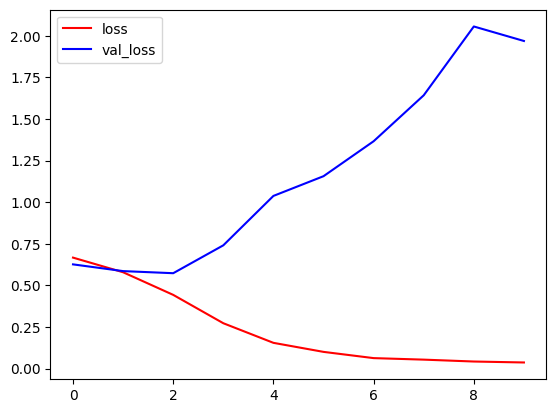

In [18]:
plt.plot(history.history['loss'],color='red',label = 'loss')

plt.plot(history.history['val_loss'],color = 'blue',label = 'val_loss')
plt.legend()
plt.show()

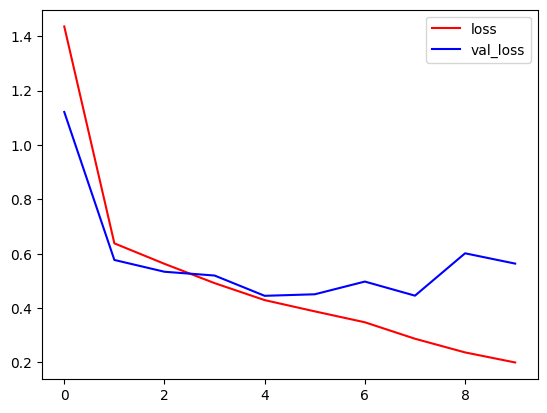

In [26]:
plt.plot(history.history['loss'],color='red',label = 'loss')

plt.plot(history.history['val_loss'],color = 'blue',label = 'val_loss')
plt.legend()
plt.show()

In [19]:
# the gap shows that the model is being overfitted 

In [ ]:
#ways to reduce overfitting 


# Ways to reduce overfitting 

1. Add more data
2. Data Augmentation
3. L1/L2 Regularization
4. Dropout
5. Batch normalization
6. reduce Complexity

In [28]:
import cv2

In [30]:
test_img = cv2.imread("/content/test/Doggo.jpg")

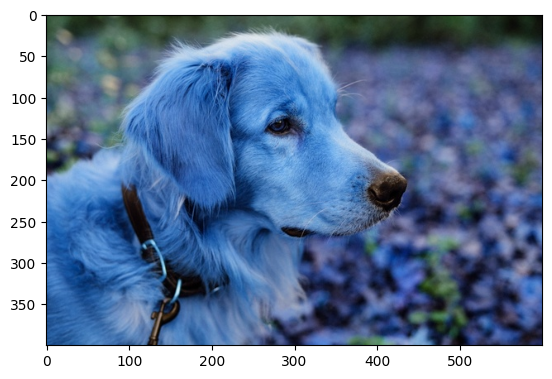

In [31]:
plt.imshow(test_img)

In [33]:
test_img.shape

(400, 600, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 263ms/step


array([[1.]], dtype=float32)

In [37]:
test_img2 = cv2.imread("/content/test/kitty.jpeg")

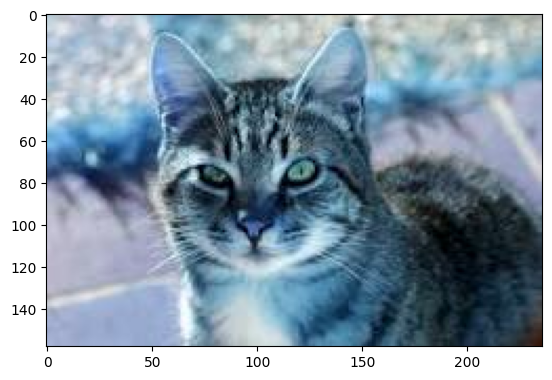

In [39]:
plt.imshow(test_img2)

In [41]:
test_img2.shape

(158, 236, 3)

In [48]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input = test_img2.reshape((1,256,256,3))

In [49]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)